# HEAP ALGORITHM IMPLEMENTATION AND TIME COMPLEXITY THROUGH BIG O NOTATION

In [2]:
import heapq

In [3]:
max_heap = []

heapq.heappush(max_heap,-10)
print(max_heap)
heapq.heappush(max_heap,-5)
print(max_heap)
heapq.heappush(max_heap,-15)
print(max_heap)
heapq.heappush(max_heap,-1)
print(max_heap)

[-10]
[-10, -5]
[-15, -5, -10]
[-15, -5, -10, -1]


Print the Heap

In [6]:
print('Max-Heap: ', [-x for x in max_heap])

Max-Heap:  [15, 5, 10, 1]


Remove and return the maximum element

In [7]:
largest = -heapq.heappop(max_heap)
print('The largest element removed is : ', largest)

print('Max-Heap: ', [-x for x in max_heap])

The largest element removed is :  15
Max-Heap:  [10, 5, 1]


## MEASURING THE TIME COMPLEXITY FOR MAX-HEAP

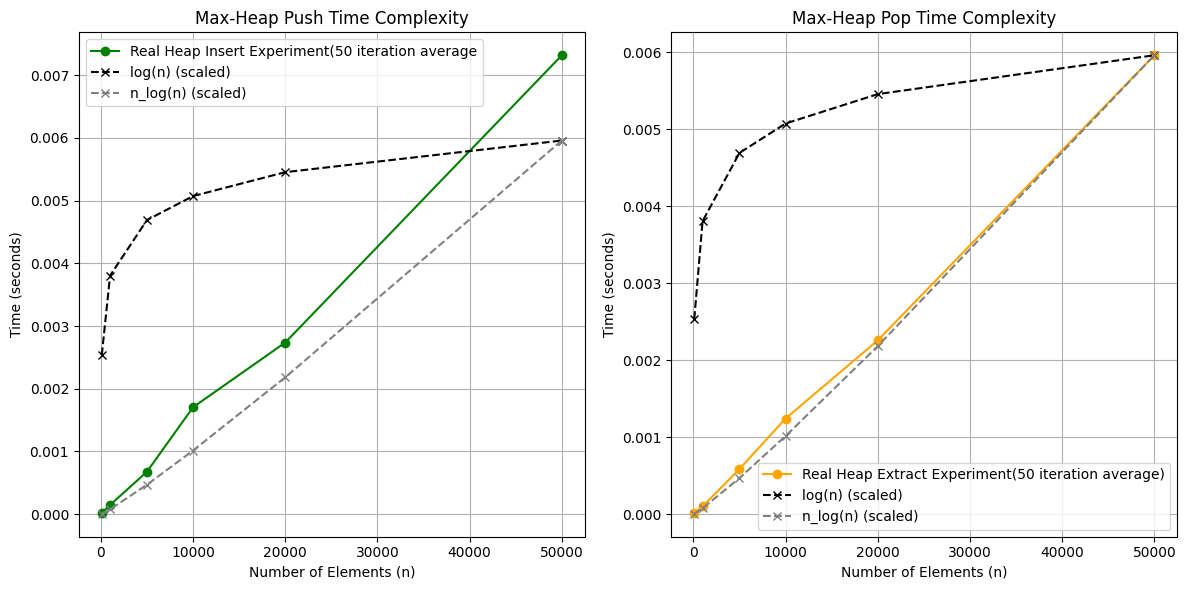

In [33]:
import heapq
import time
import random
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


#Function to measure the time to insert elements into a max-heap
def heap_push_time(n):
    max_heap = []
    elements = random.sample(range(1,n*10),n)
    start_time = time.time()
    for el in elements:
        # Insert negative element to simulate the max heap (because of the heapq package structure)
        heapq.heappush(max_heap, -el)

    return time.time() - start_time


#Function to measure the time to pop elements from max-heap
def heap_pop_time(n):
    max_heap = []
    elements = random.sample(range(1,n*10), n)
    for el in elements:
        heapq.heappush(max_heap, -el)# Insert element -el into the heap structure

    #Start measure up to this point
    start_time = time.time()
    while max_heap:
        heapq.heappop(max_heap)
    return time.time() - start_time



#Analysis Stage--------------------------------------------------------------------------

sizes = [100, 1000, 5000, 10000, 20000, 50000]

#The next loop is intended to avoid Hardware procedures that can affect the final prediction of Big O Notation
#System Load, CPU Caching
#Memory Allocation
#This effects can delay the real Time Complexity

df_push = pd.DataFrame()
for ts in range(50):
    push_times = [heap_push_time(n) for n in  sizes]
    df_push[ts] = push_times

df_push['push_times_avg'] = df_push[[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19]].mean(axis=1)



df_pop = pd.DataFrame()
for ts in range(50):
    pop_times = [heap_pop_time(n) for n in sizes]
    df_pop[ts] = push_times

df_pop['pop_times_avg'] = df_pop[[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19]].mean(axis=1)



#pop_times = [heap_pop_time(n) for n in sizes]


#Calculate the theoretical log(n) and n*log(n) values for comparison
log_n = np.log(sizes)
n_log_n = np.array(sizes) * log_n
#Normalize the log curves
log_n_scaled = log_n/ log_n.max() * max(push_times)
n_log_n_scaled = n_log_n/ n_log_n.max() * max(push_times)


#Plotting Stage
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
plt.plot(sizes, df_push['push_times_avg'].to_list() , marker = 'o', color = 'green',label = 'Real Heap Insert Experiment(50 iteration average')
plt.plot(sizes, log_n_scaled, marker = 'x', linestyle = '--', label = 'log(n) (scaled)', color = 'black')
plt.plot(sizes, n_log_n_scaled, marker = 'x', linestyle = '--', label = 'n_log(n) (scaled)', color = 'gray')
plt.title('Max-Heap Push Time Complexity')
plt.xlabel('Number of Elements (n)')
plt.ylabel('Time (seconds)')
plt.grid(True)
plt.legend()


plt.subplot(1,2,2)
plt.plot(sizes, df_pop['pop_times_avg'].to_list(), marker = 'o', color = 'orange', label = 'Real Heap Extract Experiment(50 iteration average)')
plt.plot(sizes, log_n_scaled, marker = 'x', linestyle = '--', label = 'log(n) (scaled)', color = 'black')
plt.plot(sizes, n_log_n_scaled, marker = 'x', linestyle = '--', label = 'n_log(n) (scaled)', color = 'gray')
plt.title('Max-Heap Pop Time Complexity')
plt.xlabel('Number of Elements (n)')
plt.ylabel('Time (seconds)')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()


## HEAPIFY FUNCTION AND TIME COMPLEXITY (MIN HEAP)

In [34]:
import heapq

data = [5,9,3,1,7,6]

heapq.heapify(data)

print("Heapified list: ", data)


Heapified list:  [1, 5, 3, 9, 7, 6]


In [35]:
pip install networkx

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 5.7 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [36]:
import networkx as nx

Original Data:  [5, 9, 3, 1, 7, 6]
max Heap:  [9, 7, 6, 1, 5, 3]


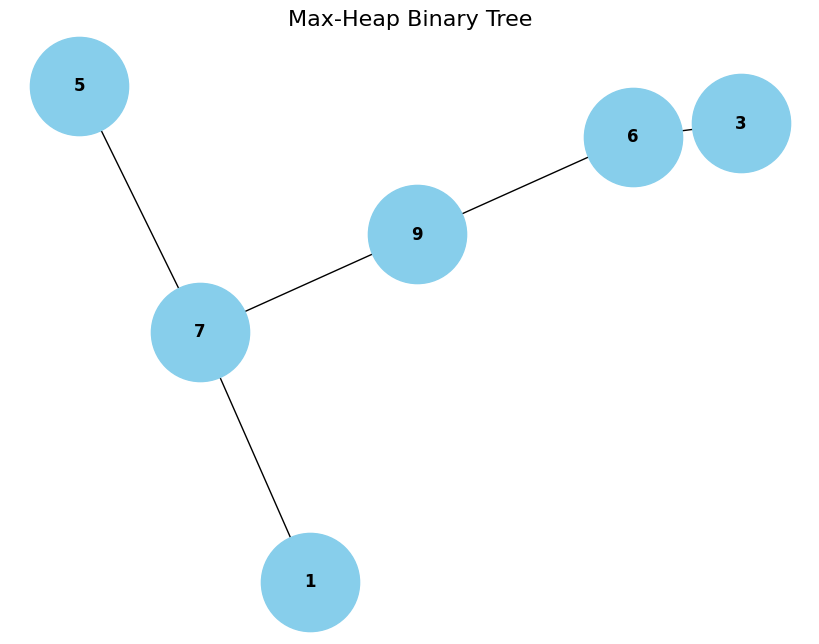

In [43]:
data = [5,9,3,1,7,6] 
print('Original Data: ',data)
neg_data = [-x for x in data]
heapq.heapify(neg_data)

max_heap = [-x for x in neg_data]

print('max Heap: ',max_heap)

def build_heap_tree(heap):
    G = nx.DiGraph()
    n = len(heap)

    for i in range(n):
        left = 2 * i + 1
        right = 2 * i + 2

        if left < n:
            G.add_edge(heap[i], heap[left])
        if right < n:
            G.add_edge(heap[i], heap[right])
    return G

G = build_heap_tree(max_heap)

pos = nx.spring_layout(G)

plt.figure(figsize=(8,6))
nx.draw(G, pos, with_labels = True, node_size= 5000, node_color='skyblue', font_size=12, font_weight='bold', arrows=False)
plt.title("Max-Heap Binary Tree", fontsize = 16)
plt.show()